In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#Part 1 ----------------------------

In [3]:
hr = pd.read_csv('hr.csv')
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
#Part 2 --------------------

In [4]:
df_stats = hr.describe()
df_stats = pd.concat([df_stats, hr.mode(axis=0, numeric_only=True)])
df_stats.drop(df_stats.index[[0, 4, 6, 9]], inplace=True)
df_stats.index = ['mean', 'std', 'min', 'mediana', 'max', 'moda']
df_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
mediana,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
moda,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


In [76]:
#Part 3 ----------------------
corr = hr.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1050,-0.1430,-0.0200,-0.1009,0.0587,-0.3884,0.0256
last_evaluation,0.1050,1.0000,0.3493,0.3397,0.1316,-0.0071,0.0066,-0.0087
number_project,-0.1430,0.3493,1.0000,0.4172,0.1968,-0.0047,0.0238,-0.0061
average_montly_hours,-0.0200,0.3397,0.4172,1.0000,0.1278,-0.0101,0.0713,-0.0035
time_spend_company,-0.1009,0.1316,0.1968,0.1278,1.0000,0.0021,0.1448,0.0674
Work_accident,0.0587,-0.0071,-0.0047,-0.0101,0.0021,1.0000,-0.1546,0.0392
left,-0.3884,0.0066,0.0238,0.0713,0.1448,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0256,-0.0087,-0.0061,-0.0035,0.0674,0.0392,-0.0618,1.0000


In [86]:
corr_max = abs(corr - np.eye(8))
max_ = corr_max.max().sort_values(ascending=False)
print(f'Самая скоррелированная пара: {max_.index[0]} и {max_.index[1]}')
print(f'Вторая по скоррелированности пара: {max_.index[2]} и {max_.index[3]}')

Самая скоррелированная пара: average_montly_hours и number_project
Вторая по скоррелированности пара: left и satisfaction_level


In [87]:
corr_min = abs(corr)
min_ = corr_min.min().sort_values(ascending=True)
print(f'Наименее скоррелированная пара: {min_.index[0]} и {min_.index[1]}')
print(f'Вторая наименее скоррелированная пара: {min_.index[2]} и {min_.index[3]}')

Наименее скоррелированная пара: time_spend_company и Work_accident
Вторая наименее скоррелированная пара: average_montly_hours и promotion_last_5years


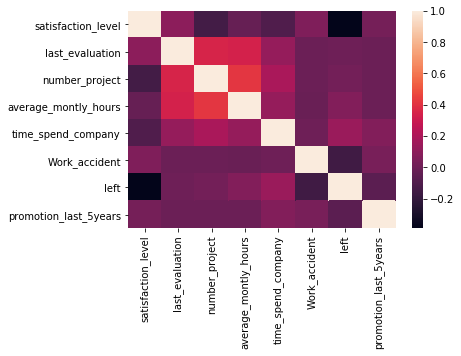

In [6]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [17]:
# Part 4------------------------------------------------------------

In [9]:
employee_qty = hr.groupby('department').count().reset_index()
employee_qty = employee_qty.iloc[:,:2]
employee_qty.columns = ['department', 'employee_qty']
employee_qty.head(10)

,department,employee_qty
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


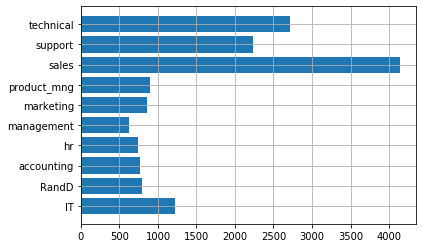

In [11]:
x = employee_qty.department
y = employee_qty.employee_qty

fig, ax = plt.subplots()

ax.barh(x, y)
plt.grid()
plt.show()

In [ ]:
#Part 5 -------------------------

In [99]:
salary_dist = hr.groupby('salary').count().reset_index()
salary_dist = salary_dist.iloc[:,0:2]
salary_dist.columns = ['salary', 'Employee_qty']
salary_dist.head()

,salary,Employee_qty
0,high,1237
1,low,7316
2,medium,6446


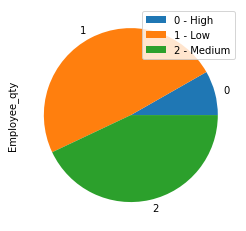

In [13]:
salary_dist.plot(kind='pie', y='Employee_qty')
plt.legend(labels = ['0 - High', '1 - Low', '2 - Medium'])

In [ ]:
#Part 6 ----------------------------------------

In [14]:
salary_sales = pd.DataFrame(hr.groupby('department').salary.value_counts())
salary_sales.columns = ['qty']
salary_sales.reset_index()
salary_sales

qty
department  salary      
IT          low      609
            medium   535
            high      83
RandD       medium   372
            low      364
            high      51
accounting  low      358
            medium   335
            high      74
hr          medium   359
            low      335
            high      45
management  high     225
            medium   225
            low      180
marketing   low      402
            medium   376
            high      80
product_mng low      451
            medium   383
            high      68
sales       low     2099
            medium  1772
            high     269
support     low     1146
            medium   942
            high     141
technical   low     1372
            medium  1147
            high     201

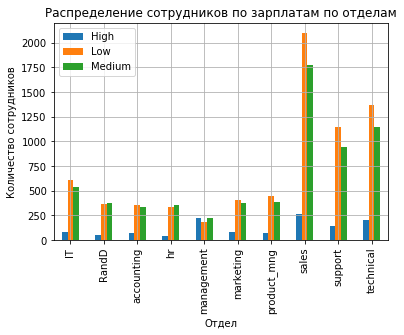

In [15]:
salary_sales.unstack().plot(kind='bar')

plt.legend(labels = ['High', 'Low', 'Medium'])
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам по отделам')
plt.grid()
plt.show()


In [18]:
#Part 7 -------------------------------

In [25]:
high_salary = hr.loc[hr.salary == 'high'].average_montly_hours
low_salary = hr.loc[hr.salary == 'low'].average_montly_hours

H0: среднее значение количества часов на рабочем месте у сотрудников с высоким и низким окладом одинаковое
H1: среднее значение количества часов на рабочем месте у сотрудников с высоким и низким окладом различается

In [29]:
alpha = 0.05
result = stats.ttest_ind(high_salary, low_salary, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, среднее значение количества часов у сотрудников с высоким и низким окладом различается')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


In [ ]:
#Part 8 -------------------------------

In [90]:
hr_left = hr.loc[hr['left'] == 1]
hr_stay = hr.loc[hr['left'] == 0]

In [96]:
print(f'Доля сотрудников с повышением среди уволившихся: {len(hr_left.loc[hr_left.promotion_last_5years == 1]) / len(hr_left):.3}')
print(f'Доля сотрудников с повышением среди оставшихся: {len(hr_stay.loc[hr_stay.promotion_last_5years == 1]) / len(hr_stay):.3}')

Доля сотрудников с повышением среди уволившихся: 0.00532
Доля сотрудников с повышением среди оставшихся: 0.0263


In [52]:
print(f'Средняя степень удовлетворенности среди уволившихся: {hr_left.satisfaction_level.mean():.4}')
print(f'Средняя степень удовлетворенности среди оставшихся: {hr_stay.satisfaction_level.mean():.4}')

Средняя степень удовлетворенности среди уволившихся: 0.4401
Средняя степень удовлетворенности среди оставшихся: 0.6668


In [53]:
print(f'Среднее количество проектов среди уволившихся: {hr_left.number_project.mean():.4}')
print(f'Среднее количество проектов среди оставшихся: {hr_stay.number_project.mean():.4}')

Среднее количество проектов среди уволившихся: 3.856
Среднее количество проектов среди оставшихся: 3.787


In [ ]:
#Part 9 -------------------------------

In [16]:
hr_LDA = hr.copy()

In [18]:
hr_LDA.drop(hr_LDA.iloc[:, 8:], axis=1, inplace=True)

In [24]:
#Разделяем все данные на тренировочную и тестовую выбоки
data_train, data_test = train_test_split(hr_LDA, test_size=0.2)
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [39]:
#Строим модель, обучаем её и предсказываем результаты
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
data_predict = lda.predict(data_test)
result = pd.DataFrame([y_test.values, data_predict]).T

In [40]:
#Оценим качество построенной модели с помощью  accuracy_score
accuracy_score(y_test.values, data_predict)

0.759

In [41]:
#Построим confusion_matrix для реальных и предсказанных данных
conf_mat = confusion_matrix(y_test, data_predict)
conf_mat

array([[2099,  211],
       [ 512,  178]], dtype=int64)